# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [1]:
#Antes de comenzar, importamos las librerias necesarias
import requests #esta librería permite enviar requests al código HTML y manejar las respuestas
import pandas as pd #esta librería permite crear y manipular dataframes

#Dado que está la tormenta Santa Rosa, un producto de interés es el paraguas
buscar = "Paraguas"

#A la hora de buscar, reemplazamos $SITE_ID por MLA, que es el sitio de Argentina.
#Además, reemplazamos ítem por "buscar" y los espacios por %20
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20")) 
print(url)

#Hacemos el request y guardamos la response en una variable
response = requests.request("GET", url)

#Vemos el texto que nos trae el request, que refiere a los productos que encontró
response.text


https://api.mercadolibre.com/sites/MLA/search?q=Paraguas


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","query":"Paraguas","paging":{"total":3314,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA1420498991","title":"Unicross 62.p5004 Paraguas Automático 21.5 Negro","condition":"new","thumbnail_id":"790717-MLU71246630032_082023","catalog_product_id":"MLA26530944","listing_type_id":"gold_special","sanitized_title":"unicross-62p5004-paraguas-automatico-215-negro","permalink":"https://www.mercadolibre.com.ar/unicross-62p5004-paraguas-automatico-215-negro/p/MLA26530944#wid=MLA1420498991&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA412056","domain_id":"MLA-UMBRELLAS","thumbnail":"http://http2.mlstatic.com/D_790717-MLU71246630032_082023-I.jpg","currency_id":"ARS","order_backend":1,"price":16389.99,"original_price":null,"sale_price":{"price_id":"","amount":16389.99,"conditions":{"eligible":true,"context_restrictions":[],"start_time":null,"end_time":null},"currency_id":"ARS","exchange_rate":nu

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [2]:
#Para guardar los  precios de los ítems, creamos un diccionario (json) para luego crear un DataFrame.
data = response.json()
data

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'Paraguas',
 'paging': {'total': 3314, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1420498991',
   'title': 'Unicross 62.p5004 Paraguas Automático 21.5 Negro',
   'condition': 'new',
   'thumbnail_id': '790717-MLU71246630032_082023',
   'catalog_product_id': 'MLA26530944',
   'listing_type_id': 'gold_special',
   'sanitized_title': 'unicross-62p5004-paraguas-automatico-215-negro',
   'permalink': 'https://www.mercadolibre.com.ar/unicross-62p5004-paraguas-automatico-215-negro/p/MLA26530944#wid=MLA1420498991&sid=unknown',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA412056',
   'domain_id': 'MLA-UMBRELLAS',
   'thumbnail': 'http://http2.mlstatic.com/D_790717-MLU71246630032_082023-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 16389.99,
   'original_price': None,
   'sale_price': {'price_id': '',
    'amount': 16389.99,
    'conditions'

In [3]:
#Para guardar el precio de los paraguas, hacemos un for loop para recorrer la clave de "results" del diccionario data,
# dentro de la cual se encuentra la información de los precios.
precios = [] #Primero inicializamos una lista vacía.

for item in data["results"]: #recorremos la clave "results" del diccionario data.
    precios.append({
        "nombre_del_item": item["title"],
        "precio": item["price"],
    }) #Agregamos a la lista "precios" el nombre del ítem y su precio correspondiente.

precios

[{'nombre_del_item': 'Unicross 62.p5004 Paraguas Automático 21.5 Negro',
  'precio': 16389.99},
 {'nombre_del_item': 'Paraguas Corto Unicross 21,5 Pulgadas Abre Automático Antiviento',
  'precio': 16990},
 {'nombre_del_item': 'Paraguas Transparente Vinilico Varios Colores Subte A',
  'precio': 5943.79},
 {'nombre_del_item': 'Paraguas Automático Abre Cierra Corto Reforzado 10 Gajos Hq',
  'precio': 26640},
 {'nombre_del_item': 'Paraguas Reforzado Anti Viento Diseño Colores Autom��tico Color Negro 310095 Diseño De La Tela Liso',
  'precio': 11990},
 {'nombre_del_item': 'Paraguas Negro Para Mujer Paraguas Estándar Para Hombre',
  'precio': 6500},
 {'nombre_del_item': 'Paraguas Unicross Corto Semiaut. 21,5  Mango Madera',
  'precio': 14108},
 {'nombre_del_item': 'Paraguas Impermeable Infantil Lluvia Automatico Disney Wabro Color Cars Amarillo',
  'precio': 16055},
 {'nombre_del_item': 'Paraguas De Lluvia Reforzado Grande Unisex Color Bordó Diseño De La Tela Liso',
  'precio': 15289.98},
 {

In [4]:
#Ahora creamos un DataFrame a partir de la lista de precios que creamos anteriormente.
paraguas_df = pd.DataFrame(precios)
paraguas_df.head()


nombre_del_item    precio
0   Unicross 62.p5004 Paraguas Automático 21.5 Negro  16389.99
1  Paraguas Corto Unicross 21,5 Pulgadas Abre Aut...  16990.00
2  Paraguas Transparente Vinilico Varios Colores ...   5943.79
3  Paraguas Automático Abre Cierra Corto Reforzad...  26640.00
4  Paraguas Reforzado Anti Viento Diseño Colores ...  11990.00

In [5]:
#Para calcular el precio promedio de los paraguas, utilizamos el método mean() de pandas.
average_price = paraguas_df['precio'].mean()
average_price

16140.2202

In [6]:
#Para calcular el precio máximo de los paraguas, utilizamos el método max() de pandas.	
max_price = paraguas_df['precio'].max()
max_price

47296.0

In [7]:
#Para calcular el precio mínimo de los paraguas, utilizamos el método min() de pandas.
min_price = paraguas_df['precio'].min()
min_price

5943.79

#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

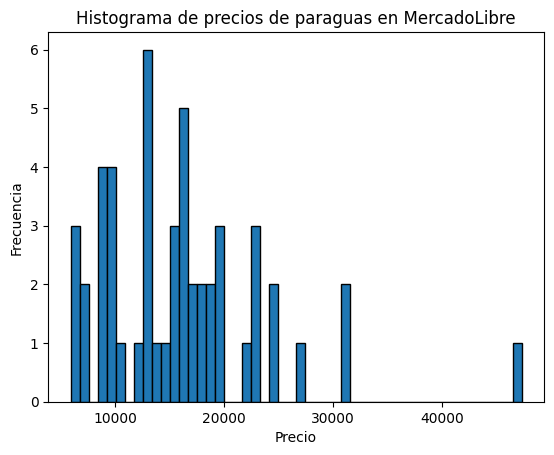

In [11]:
#Para hacer un histograma, importamos la librería matplotlib como plt
import matplotlib.pyplot as plt

#Creamos el histograma llamando la columna de precios del df, especificando la cantidad de bins y el color de los bordes
plt.hist(paraguas_df['precio'], bins=50, edgecolor='black')

#Agregamos el nombre de los ejes y el título
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios de paraguas en MercadoLibre')

plt.show()

In [33]:
#A simple vista, pareciera ser que hay dos outliers, uno por encima de los $30000 y otro por encima de los $40000.
#Para confirmar esto, vamos a calcular los outliers.
#Calculate the z-scores for each price in the dataframe.
#Para calcular los z-scores, importamos la librería scipy.stats.
from scipy import stats

z_scores = stats.zscore(paraguas_df['precio']) #estandarizamos cada precio calculando el z score.
outliers = paraguas_df[abs(z_scores) > 3] #identificamos los outliers como aquellos cuyo z-score es mayor a 3.
outliers #finalmente nos damos cuenta de que el único outlier es el dato N° 41, cuyo precio es de $45000.

nombre_del_item   precio
41  Paraguas Golf Premium Antiviento Automatic | T...  47296.0

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

Vamos a explorar la funcionalidad de búsqueda por categorías en Mercado Libre Argentina (MLA). De forma resumida, esta opción devuelve publicaciones que pertenecen a una categoría de publicación de Mercado Libre. Para más información se puede acceder al apartado de [Cateogrías y Atributos](https://developers.mercadolibre.com.ar/es_ar/categorias-y-atributos). 

In [34]:
buscar2 = "MLA1055" #Por ejemplo, vamos a buscar la categoría MLA1055, que corresponde a "Celulares".

#Hacemos el mismo procedimiento que realizamos arriba pero con el url correspondiente.
url2 = "https://api.mercadolibre.com/sites/{}/search?category={}".format("MLA", buscar2.replace(" ", "%20")) 
print(url2)
#Hacemos el request y obtenemos la response
response2 = requests.request("GET", url2)
response2.text


https://api.mercadolibre.com/sites/MLA/search?category=MLA1055


'{"site_id":"MLA","country_default_time_zone":"GMT-03:00","paging":{"total":27064,"primary_results":1000,"offset":0,"limit":50},"results":[{"id":"MLA1882850490","title":" Moto E22 64 Gb  Azul 4 Gb Ram","condition":"new","thumbnail_id":"628410-MLA54073127628_022023","catalog_product_id":"MLA29728635","listing_type_id":"gold_pro","sanitized_title":"moto-e22-64-gb-azul-4-gb-ram","permalink":"https://www.mercadolibre.com.ar/moto-e22-64-gb-azul-4-gb-ram/p/MLA29728635#wid=MLA1882850490&sid=unknown","buying_mode":"buy_it_now","site_id":"MLA","category_id":"MLA1055","domain_id":"MLA-CELLPHONES","thumbnail":"http://http2.mlstatic.com/D_628410-MLA54073127628_022023-I.jpg","currency_id":"ARS","order_backend":1,"price":264999,"original_price":299999,"sale_price":{"price_id":"","amount":264999,"conditions":{"eligible":true,"context_restrictions":["channel_marketplace"],"start_time":"2024-09-06T03:00:00Z","end_time":"2024-09-07T02:59:59Z"},"currency_id":"ARS","exchange_rate":null,"payment_method_pri

In [36]:
#Guardamos la response en un diccionario json en la variable data2.
data2 = response2.json()
data2

{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'paging': {'total': 27064, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1882850490',
   'title': ' Moto E22 64 Gb  Azul 4 Gb Ram',
   'condition': 'new',
   'thumbnail_id': '628410-MLA54073127628_022023',
   'catalog_product_id': 'MLA29728635',
   'listing_type_id': 'gold_pro',
   'sanitized_title': 'moto-e22-64-gb-azul-4-gb-ram',
   'permalink': 'https://www.mercadolibre.com.ar/moto-e22-64-gb-azul-4-gb-ram/p/MLA29728635#wid=MLA1882850490&sid=unknown',
   'buying_mode': 'buy_it_now',
   'site_id': 'MLA',
   'category_id': 'MLA1055',
   'domain_id': 'MLA-CELLPHONES',
   'thumbnail': 'http://http2.mlstatic.com/D_628410-MLA54073127628_022023-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 264999,
   'original_price': 299999,
   'sale_price': {'price_id': '',
    'amount': 264999,
    'conditions': {'eligible': True,
     'context_restrictions': ['channel_marketplace'],
     's

In [49]:
#El resultado que vamos a analizar es la comparación entre el precio original del producto y el precio actual. 
comparacion_precios = [] #Inicializamos una lista vacía para guardar los resultados de la comparación.

#Creamos un for loop que recorra la clave "results" del diccionario data2, que contiene la información de los precios.
for item in data2["results"]:
    precio_actual = item["price"] #guardamos el precio actual del ítem.
    precio_original = item['original_price'] #guardamos el precio original del ítem.
    
    #Comparamos todos los posibles casos.
    #Primero aseguremos que ambos precios no sean nulos y que el precio actual sea mayor al original.
    if precio_actual is not None and precio_original is not None and precio_actual > precio_original: 
        comparison = "mayor"
    #Luego aseguramos que ambos precios no sean nulos y que el precio actual sea menor al original.
    elif precio_actual is not None and precio_original is not None and precio_actual < precio_original:
        comparison = "menor"
    else:
        comparison = "igual"
    
    #Agregamos el nombre del ítem, su precio actual, el original y la comparación a la lista "comparacion_precios".
    comparacion_precios.append({
        "item": item["title"],
        "precio": precio_actual,
        "precio_original": precio_original,
        "comparacion": comparison
    })

#Lo convertimos en un df y lo mostramos
comparacion_precios_df = pd.DataFrame(comparacion_precios)
comparacion_precios_df.head()

item  precio  precio_original  \
0                      Moto E22 64 Gb  Azul 4 Gb Ram  264999        299999.00   
1   Samsung Galaxy A15 128 Gb Negro Azulado 4 Gb Ram  329999        432061.54   
2  Xiaomi Redmi 13c Dual Sim 128 Gb  Midnight Bla...  349999        388999.00   
3               Tcl 40 Se 256 Gb  Dark Gray 6 Gb Ram  279999        319999.00   
4      Samsung Galaxy A55 256gb Awesome Navy 8gb Ram  999999       1028719.38   

  comparacion  
0       menor  
1       menor  
2       menor  
3       menor  
4       menor

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [52]:
#Primero importamos las librerías necesarias. 
import requests #enviar requests a código HTML y manejar las reponses.
from bs4 import BeautifulSoup #html parser, programa que analiza el código html.
import pandas as pd #Para manejar df.


In [53]:
url = "https://www.lanacion.com.ar/" #url de la página a scrapear

r = requests.get(url) #traigo el contenido del html
contenido = r.content #guardo el contenido en una variable

contenido #muestro el contenido

b'<!DOCTYPE html><html lang="es"><head><meta charset="utf-8"/><meta name="viewport" content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes"/><meta name="theme-color" content="#ffffff"/><title>\xc3\x9altimas noticias de Argentina y el mundo - LA NACION</title><link rel="preload" as="image" fetchPriority="high" media="(min-width: 768px)" href="https://www.lanacion.com.ar/resizer/v2/cristina-kirchner-y-javier-TZNEAZKMRNBZDKB2HTGVS25OGU.JPG?auth=255b2cfed95a1f59d7517afd6e0f4fb7a0d03633d6140f05cbc6f459ca4f55fd&amp;width=488&amp;height=325&amp;quality=70&amp;smart=true"/><link rel="preload" as="image" fetchPriority="high" media="(max-width: 767px)" href="https://www.lanacion.com.ar/resizer/v2/cristina-kirchner-y-javier-TZNEAZKMRNBZDKB2HTGVS25OGU.JPG?auth=255b2cfed95a1f59d7517afd6e0f4fb7a0d03633d6140f05cbc6f459ca4f55fd&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true"/><style id="critical-fonts">\n@font-face {font-family:\'Prumo\';src:url

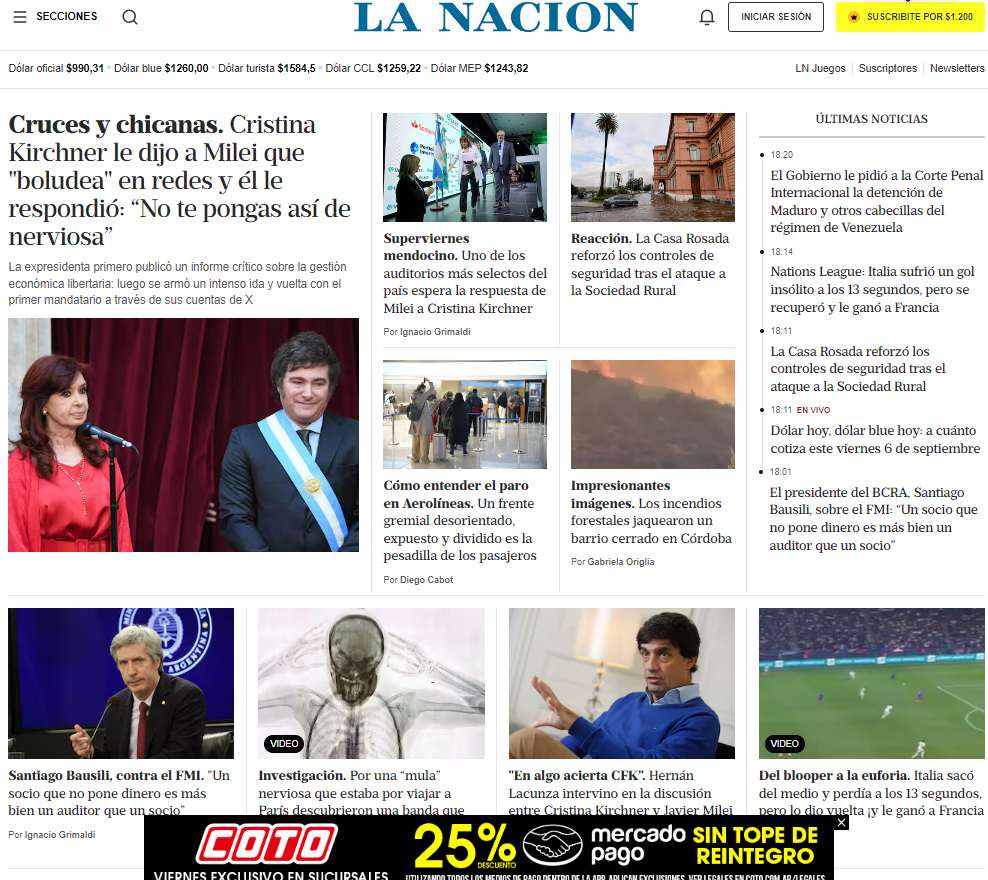

In [54]:
soup = BeautifulSoup(contenido, "html.parser") #parseo el contenido con BeautifulSoup
soup

<!DOCTYPE html>
<html lang="es"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1.0,minimum-scale=0.5,maximum-scale=5.0,user-scalable=yes" name="viewport"/><meta content="#ffffff" name="theme-color"/><title>Últimas noticias de Argentina y el mundo - LA NACION</title><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/cristina-kirchner-y-javier-TZNEAZKMRNBZDKB2HTGVS25OGU.JPG?auth=255b2cfed95a1f59d7517afd6e0f4fb7a0d03633d6140f05cbc6f459ca4f55fd&amp;width=488&amp;height=325&amp;quality=70&amp;smart=true" media="(min-width: 768px)" rel="preload"/><link as="image" fetchpriority="high" href="https://www.lanacion.com.ar/resizer/v2/cristina-kirchner-y-javier-TZNEAZKMRNBZDKB2HTGVS25OGU.JPG?auth=255b2cfed95a1f59d7517afd6e0f4fb7a0d03633d6140f05cbc6f459ca4f55fd&amp;width=420&amp;height=280&amp;quality=70&amp;smart=true" media="(max-width: 767px)" rel="preload"/><style id="critical-fonts">
@font-face {font-family:'Prumo';src:url('/pf/resou

In [56]:
#Dentro de la sopa, el método "find_all" me permite buscar todos los elementos de la página con ese tag HTML y devuelve un objeto 
#de la clase "bs4.element.ResultSet". En este caso, como queremos buscar los links a las noticias de la página principal,
#buscamos los elementos "a" que tengan la clase "link ln-link flex flex-column --unstyled".
anchor_elements = soup.find_all('a', class_ = 'link ln-link flex flex-column --unstyled') 
print('\n', anchor_elements)



 [<a class="link ln-link flex flex-column --unstyled" href="/politica/nuevo-round-cristina-kirchner-le-dijo-a-milei-que-hace-plagio-y-que-se-dedica-a-boludear-en-redes-nid06092024/" target="_self" title='Cruces y chicanas. Cristina Kirchner le dijo a Milei que "boludea" en redes y él le respondió: “No te pongas así de nerviosa”'><section class="media-container" href="/politica/nuevo-round-cristina-kirchner-le-dijo-a-milei-que-hace-plagio-y-que-se-dedica-a-boludear-en-redes-nid06092024/" title='Cristina Kirchner le dijo a Milei que "boludea" en redes y él le respondió: “No te pongas así de nerviosa”'><picture class="ln-placeholder flex jc-center ai-center relative ratio-3-2"><source media="(min-width: 768px)" srcset="https://www.lanacion.com.ar/resizer/v2/cristina-kirchner-y-javier-TZNEAZKMRNBZDKB2HTGVS25OGU.JPG?auth=255b2cfed95a1f59d7517afd6e0f4fb7a0d03633d6140f05cbc6f459ca4f55fd&amp;width=488&amp;height=325&amp;quality=70&amp;smart=true"/><img alt='Cristina Kirchner le dijo a Milei q

In [60]:
#Tenemos que guardar estos links para armar el df. Para eso, inicializamos una lista vacía.
links = []
#Además, queremos guardar el dominio de la página para armar los links completos.
domain = "https://www.lanacion.com.ar/"

#Extraemos el texto de cada clave "href" del elemento <a>, le agregamos el dominio y lo guardamos en la lista "links".
for anchor_element in anchor_elements:
    anchor_text = domain + anchor_element['href']

    links.append({
        'links': anchor_text
        })

links

[{'links': 'https://www.lanacion.com.ar//politica/nuevo-round-cristina-kirchner-le-dijo-a-milei-que-hace-plagio-y-que-se-dedica-a-boludear-en-redes-nid06092024/'},
 {'links': 'https://www.lanacion.com.ar//economia/uno-de-los-auditorias-mas-selectos-del-pais-espera-la-respuesta-de-milei-a-cristina-kirchner-nid06092024/'},
 {'links': 'https://www.lanacion.com.ar//politica/la-casa-rosada-reforzo-controles-tras-el-ataque-a-la-sociedad-rural-nid06092024/'},
 {'links': 'https://www.lanacion.com.ar//economia/un-frente-gremial-desorientado-expuesto-y-dividido-es-la-pesadilla-de-los-pasajeros-nid06092024/'},
 {'links': 'https://www.lanacion.com.ar//sociedad/alerta-en-cordoba-controlaron-el-incendio-camino-a-carlos-paz-pero-hay-otros-dos-focos-activos-nid06092024/'},
 {'links': 'https://www.lanacion.com.ar//seguridad/por-una-mula-nerviosa-que-estaba-por-viajar-a-paris-descubrieron-una-banda-que-traficaba-cocaina-a-nid06092024/'},
 {'links': 'https://www.lanacion.com.ar//politica/el-gobierno-le-p

In [61]:
#Creamos un dataframe a partir de la lista de títulos.
links_df = pd.DataFrame(links)
links_df

links
0    https://www.lanacion.com.ar//politica/nuevo-ro...
1    https://www.lanacion.com.ar//economia/uno-de-l...
2    https://www.lanacion.com.ar//politica/la-casa-...
3    https://www.lanacion.com.ar//economia/un-frent...
4    https://www.lanacion.com.ar//sociedad/alerta-e...
..                                                 ...
123  https://www.lanacion.com.ar//revista-jardin/po...
124  https://www.lanacion.com.ar//feriados/2024/dia...
125  https://www.lanacion.com.ar//espectaculos/musi...
126  https://www.lanacion.com.ar//espectaculos/cuan...
127  https://www.lanacion.com.ar//clima/el-clima-en...

[128 rows x 1 columns]

In [64]:
#Ahora que tenemos el df con los links, vamos a guardarlos en un archivo de excel.
#Para eso, primero necesitamos importar la librería openpyxl.
import openpyxl
#Finalmente, guardamos el df en un archivo de excel.
links_df.to_excel('links-Bernhadt_Laszeski_Luque.xlsx', index=False)